/root/miniconda3/envs/lora_train_cjh/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  8.05it/s]
The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


<bottle_broken_large>


100%|██████████| 50/50 [00:02<00:00, 24.80it/s]


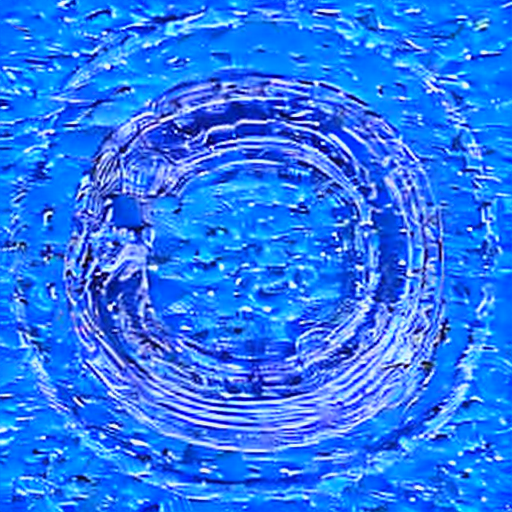

In [1]:
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
from lora_diffusion.lora import tune_lora_scale, patch_pipe
import torch

model_id = "/root/stable-diffusion-2-1-base"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda:0"
)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

# pipe1 = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
#     "cuda:2"
# )

prompt = "a photo of <bottle_broken_large>"

# patch_pipe(
#     pipe1,
#     # "/root/lora_train/nut_right/final_lora/final_step_1000.safetensors",
#     "/root/custom_example/new_experiment/nut_new_ex/up/final_lora.safetensors",
#     patch_text=True,
#     patch_ti=True,
#     patch_unet=True,
# )

patch_pipe(
    pipe,
    # "/root/lora_train/nut_right/final_lora/final_step_1000.safetensors",
    # "/root/lora_train/combine15/final_lora/final_step_5000.safetensors",
    # "/root/lora_train/multi_combine_20250617_211727/multi_teacher_distilled/final_multi_teacher_lora_step_5000.safetensors",
    # "/root/lora_train/multi_combine_20250623_113607/multi_teacher_distilled/final_multi_teacher_lora_step_5000.safetensors",
    # "/root/custom_example/dis_lora_weight/gasket_up.safetensors",
    # "/root/custom_example/dis_lora_weight/nail.safetensors",
    # "/root/custom_example/dis_lora_weight/nut_front.safetensors",
    # "/root/custom_example/dis_lora_weight/nut_up.safetensors",
    # "/root/custom_example/dis_lora_weight/screw_front.safetensors",
    # "/root/custom_example/dis_lora_weight/screw_up.safetensors",
    # "/root/custom_example/dis_lora_weight/screw_combine_lora.safetensors",
    # "/root/custom_example/dis_lora_weight/nut_combine_lora.safetensors",
    # "/root/custom_example/dis_lora_weight/nail_and_gasket_lora.safetensors",
    # "/root/lora_train/multi_combine_20250703_172203/multi_teacher_distilled/final_multi_teacher_hybrid_lora_step_5000.safetensors",
    # "/root/lora_train/multi_combine_20250716_233014/multi_teacher_distilled/final_multi_teacher_hybrid_lora_step_5000.safetensors",
    # "/root/lora_weight_before_distill/ceramic_capacitor_front_5000/final_lora.safetensors",
    # "/root/lora_train/multi_combine_20250717_182011/multi_teacher_distilled/final_multi_teacher_hybrid_lora_step_5000.safetensors",
    # "/root/lora_train/multi_combine_20250717_175353/multi_teacher_distilled/final_multi_teacher_hybrid_lora_step_5000.safetensors",
    # "/root/lora_train/multi_combine_20250717_175343/multi_teacher_distilled/final_multi_teacher_hybrid_lora_step_5000.safetensors",
    # "/root/lora_weight_before_distill/distill_weight3/plastic_washer_up.safetensors",
    # "/root/lora_train/multi_combine_20250717_205233/multi_teacher_distilled/final_multi_teacher_hybrid_lora_step_5000.safetensors",
    # "/root/lora_train/multi_combine_20250721_111642/multi_teacher_distilled/final_multi_teacher_hybrid_lora_step_5000.safetensors",
    # "/root/lora_train/multi_combine_add/resistor_diode2.safetensors",
    # "/root/lora_train/multi_combine_20250725_210930/multi_teacher_distilled/final_multi_teacher_hybrid_lora_step_5000.safetensors",
    "/root/lora/lora_weight/bottle_broken_large_canny/final_lora.safetensors",
    patch_text=True,
    patch_ti=True,
    patch_unet=True,
)

# pipe.text_encoder = pipe1.text_encoder

tune_lora_scale(pipe.unet, 1.0)
tune_lora_scale(pipe.text_encoder, 1.0)

torch.manual_seed(48)
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5, height=512, weight=512).images[0]
image.save("../contents/lion_illust.jpg")
image


/root/miniconda3/envs/lora_train_cjh/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  7.83it/s]
The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


<bottle_broken_large>


100%|██████████| 50/50 [00:02<00:00, 21.65it/s]


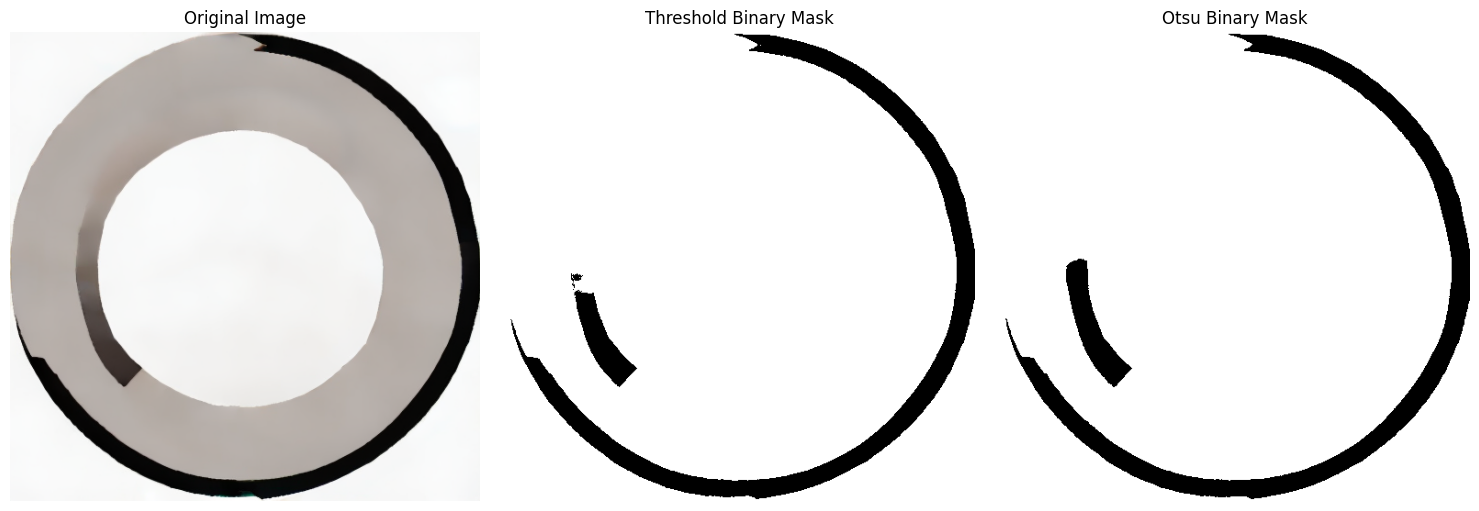

掩码形状: (512, 512)
掩码数据类型: uint8
掩码值范围: 0 - 255


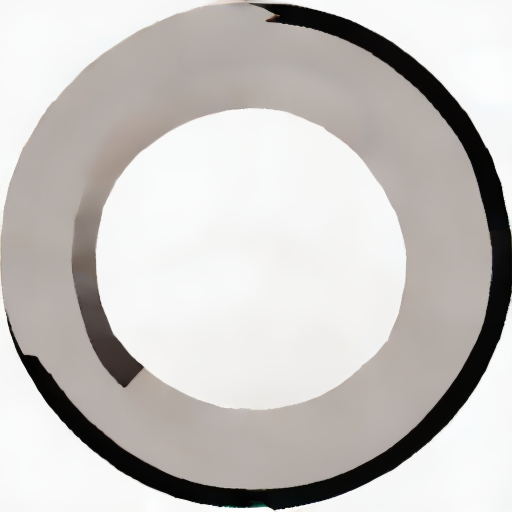

In [1]:
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
from lora_diffusion.lora import tune_lora_scale, patch_pipe
import torch
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

model_id = "/root/stable-diffusion-2-1-base"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda:0"
)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

# pipe1 = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
#     "cuda:2"
# )

prompt = "a photo of <bottle_broken_large>"

# patch_pipe(
#     pipe1,
#     # "/root/lora_train/nut_right/final_lora/final_step_1000.safetensors",
#     "/root/custom_example/new_experiment/nut_new_ex/up/final_lora.safetensors",
#     patch_text=True,
#     patch_ti=True,
#     patch_unet=True,
# )

patch_pipe(
    pipe,
    # "/root/lora_train/nut_right/final_lora/final_step_1000.safetensors",
    # "/root/lora_train/combine15/final_lora/final_step_5000.safetensors",
    # "/root/lora_train/multi_combine_20250617_211727/multi_teacher_distilled/final_multi_teacher_lora_step_5000.safetensors",
    # "/root/lora_train/multi_combine_20250623_113607/multi_teacher_distilled/final_multi_teacher_lora_step_5000.safetensors",
    # "/root/custom_example/dis_lora_weight/gasket_up.safetensors",
    # "/root/custom_example/dis_lora_weight/nail.safetensors",
    # "/root/custom_example/dis_lora_weight/nut_front.safetensors",
    # "/root/custom_example/dis_lora_weight/nut_up.safetensors",
    # "/root/custom_example/dis_lora_weight/screw_front.safetensors",
    # "/root/custom_example/dis_lora_weight/screw_up.safetensors",
    # "/root/custom_example/dis_lora_weight/screw_combine_lora.safetensors",
    # "/root/custom_example/dis_lora_weight/nut_combine_lora.safetensors",
    # "/root/custom_example/dis_lora_weight/nail_and_gasket_lora.safetensors",
    # "/root/lora_train/multi_combine_20250703_172203/multi_teacher_distilled/final_multi_teacher_hybrid_lora_step_5000.safetensors",
    # "/root/lora_train/multi_combine_20250716_233014/multi_teacher_distilled/final_multi_teacher_hybrid_lora_step_5000.safetensors",
    # "/root/lora_weight_before_distill/ceramic_capacitor_front_5000/final_lora.safetensors",
    # "/root/lora_train/multi_combine_20250717_182011/multi_teacher_distilled/final_multi_teacher_hybrid_lora_step_5000.safetensors",
    # "/root/lora_train/multi_combine_20250717_175353/multi_teacher_distilled/final_multi_teacher_hybrid_lora_step_5000.safetensors",
    # "/root/lora_train/multi_combine_20250717_175343/multi_teacher_distilled/final_multi_teacher_hybrid_lora_step_5000.safetensors",
    # "/root/lora_weight_before_distill/distill_weight3/plastic_washer_up.safetensors",
    # "/root/lora_train/multi_combine_20250717_205233/multi_teacher_distilled/final_multi_teacher_hybrid_lora_step_5000.safetensors",
    # "/root/lora_train/multi_combine_20250721_111642/multi_teacher_distilled/final_multi_teacher_hybrid_lora_step_5000.safetensors",
    # "/root/lora_train/multi_combine_add/resistor_diode2.safetensors",
    # "/root/lora_train/multi_combine_20250725_210930/multi_teacher_distilled/final_multi_teacher_hybrid_lora_step_5000.safetensors",
    "/root/lora/lora_weight/bottle_broken_large/final_lora.safetensors",
    patch_text=True,
    patch_ti=True,
    patch_unet=True,
)

# pipe.text_encoder = pipe1.text_encoder

tune_lora_scale(pipe.unet, 1.0)
tune_lora_scale(pipe.text_encoder, 1.0)

torch.manual_seed(48)
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5, height=512, width=512).images[0]
image.save("../contents/lion_illust.jpg")

# 二值掩码生成函数
def create_binary_mask_threshold(image, threshold=128):
    """使用灰度阈值创建二值掩码"""
    gray = image.convert('L')
    gray_array = np.array(gray)
    binary_mask = (gray_array > threshold).astype(np.uint8) * 255
    return Image.fromarray(binary_mask)

def create_binary_mask_otsu(image):
    """使用Otsu算法自动选择阈值"""
    gray = image.convert('L')
    gray_array = np.array(gray)
    _, binary_mask = cv2.threshold(gray_array, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return Image.fromarray(binary_mask)

def create_binary_mask_color(image, lower_color=[0, 0, 0], upper_color=[50, 50, 50]):
    """基于颜色范围创建二值掩码"""
    img_array = np.array(image)
    mask = cv2.inRange(img_array, np.array(lower_color), np.array(upper_color))
    mask = 255 - mask  # 反转掩码
    return Image.fromarray(mask)

# 生成二值掩码
binary_mask_threshold = create_binary_mask_threshold(image, threshold=100)
binary_mask_otsu = create_binary_mask_otsu(image)

# 保存二值掩码
binary_mask_threshold.save("../contents/binary_mask_threshold.jpg")
binary_mask_otsu.save("../contents/binary_mask_otsu.jpg")

# 显示结果对比
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(binary_mask_threshold, cmap='gray')
axes[1].set_title("Threshold Binary Mask")
axes[1].axis('off')

axes[2].imshow(binary_mask_otsu, cmap='gray')
axes[2].set_title("Otsu Binary Mask")
axes[2].axis('off')

plt.tight_layout()
plt.show()

# 输出掩码信息
mask_array = np.array(binary_mask_otsu)
print(f"掩码形状: {mask_array.shape}")
print(f"掩码数据类型: {mask_array.dtype}")
print(f"掩码值范围: {mask_array.min()} - {mask_array.max()}")

# 显示原始图像
image